  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1           1  
2           4  
3   

C:\Users\saisr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\saisr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


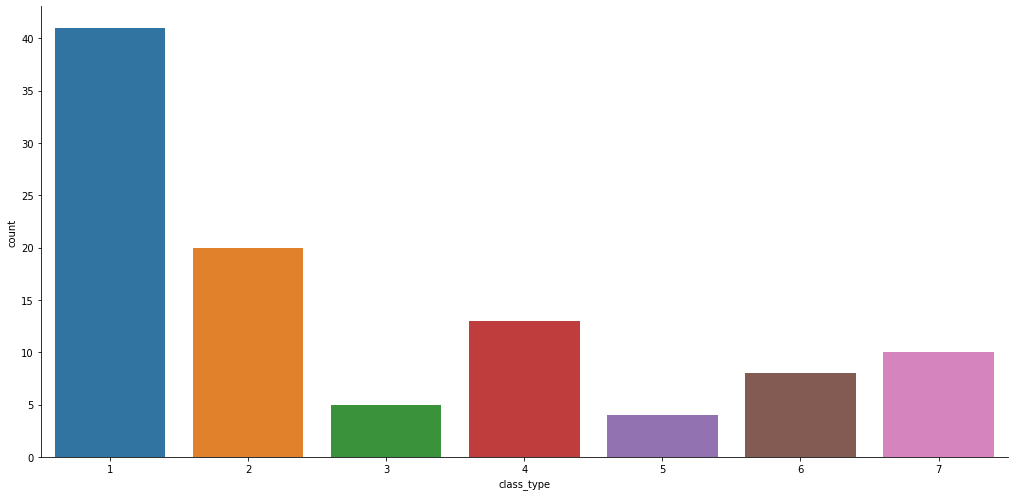

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

zoo = pd.read_csv("zoo.csv")
print(zoo.head())

zoo.describe()

duplicates = zoo.eggs.value_counts()
duplicates[duplicates>1]
print(duplicates)

pick = zoo.loc[zoo['animal_name']=='antelope']
print(pick)

new_ani = pd.read_csv("class.csv")
dfram = pd.merge(zoo,new_ani,how = "left",left_on = "class_type",right_on = "Class_Number" )
print(dfram.head(10))

import seaborn as sns
sns.factorplot('class_type',kind = "count",height = 7,data = zoo,aspect = 2)

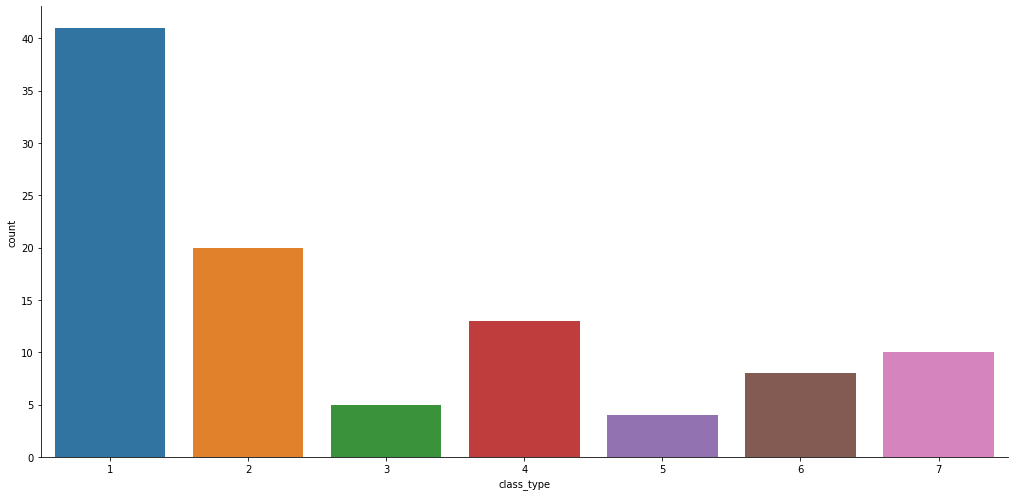

In [3]:
sns.factorplot('class_type',kind = "count",height = 7,data = zoo,aspect = 2)

splitting the dataset into train and test dataset

In [4]:
from sklearn.model_selection import train_test_split
X = zoo.iloc[:,1:17]
y = zoo.iloc[:,17]
X,y

(     hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
 0       1         0     0     1         0        0         1        1   
 1       1         0     0     1         0        0         0        1   
 2       0         0     1     0         0        1         1        1   
 3       1         0     0     1         0        0         1        1   
 4       1         0     0     1         0        0         1        1   
 ..    ...       ...   ...   ...       ...      ...       ...      ...   
 96      1         0     0     1         0        0         0        1   
 97      1         0     1     0         1        0         0        0   
 98      1         0     0     1         0        0         1        1   
 99      0         0     1     0         0        0         0        0   
 100     0         1     1     0         1        0         0        0   
 
      backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
 0           1         1         0  

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

#install graphviz (export_graphviz function is for displaying tree in jupyter notebook and converts decision tree classifier to #dot file) and pydotplus(converts dotfile into png or displayable format on jupyter note book)

In [6]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from IPython.display import Image
from sklearn.metrics import accuracy_score
from pydotplus import graph_from_dot_data

In [7]:
clsf = DecisionTreeClassifier(criterion = 'gini',random_state = 1)
clsf.fit(X_train,y_train)
y_pred = clsf.predict(X_test)
score = accuracy_score(y_test,y_pred)
score*100

96.7741935483871

In [8]:
y_pred = clsf.predict([[1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0]])
y_pred

array([6], dtype=int64)

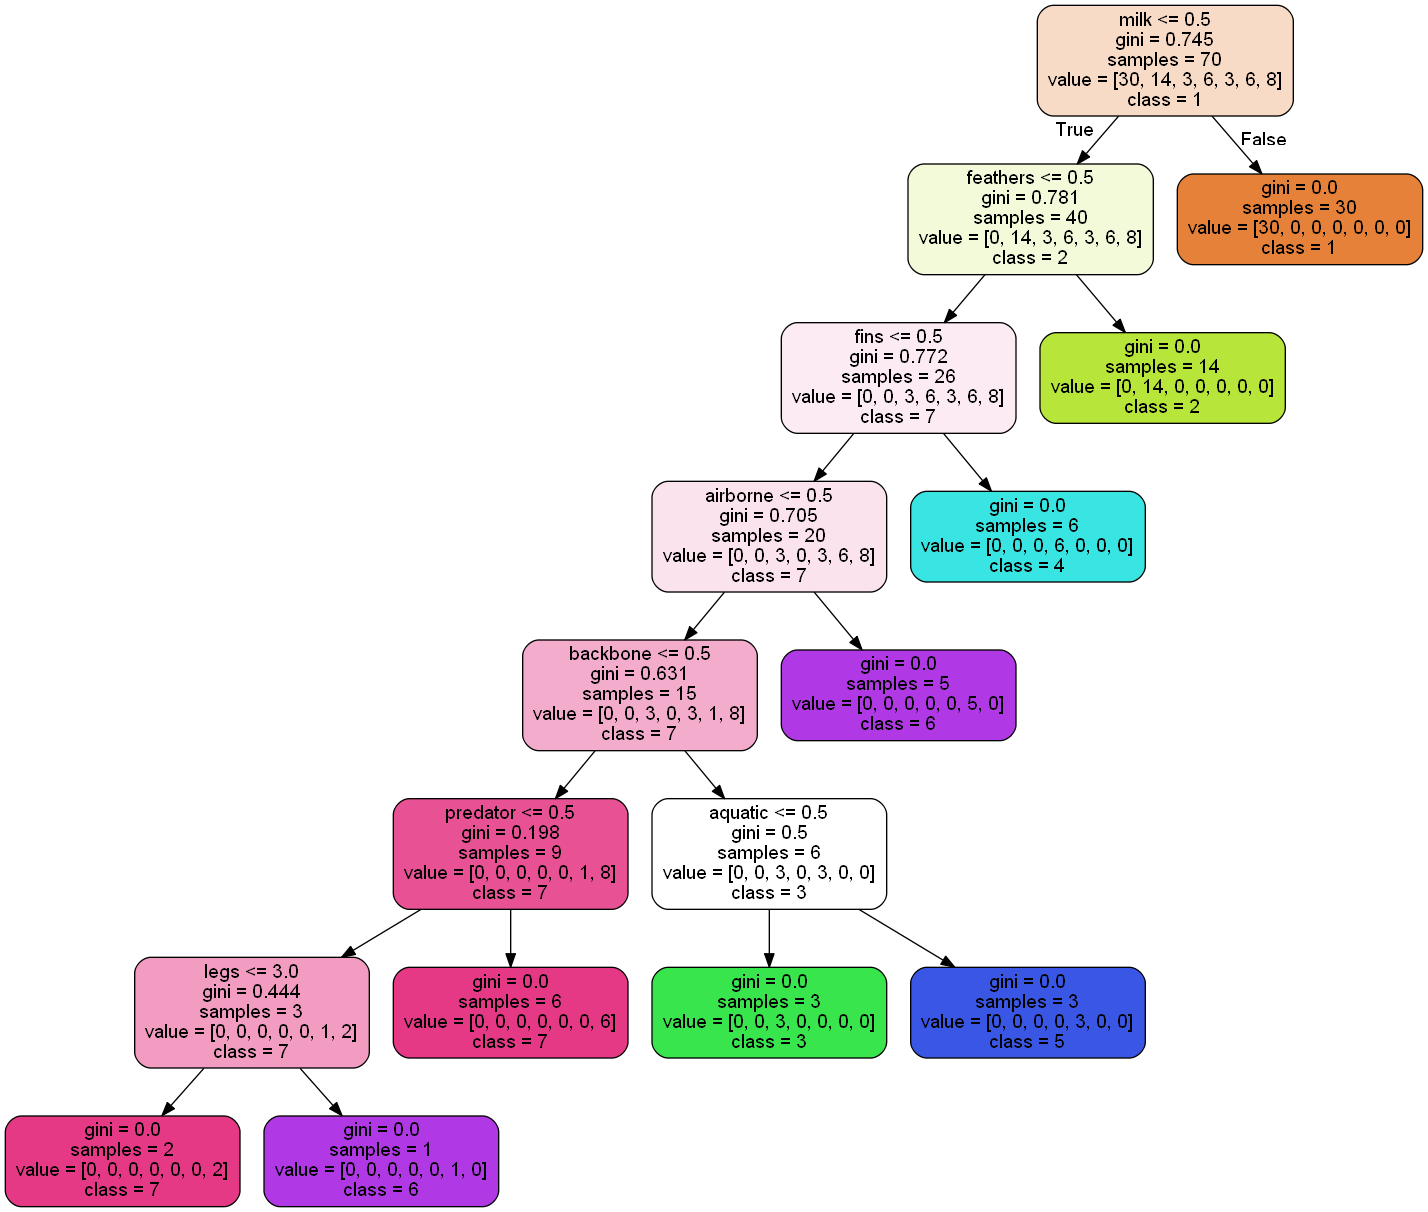

In [9]:
import os
os.environ["PATH"]+= os.environ["PATH"]+';'+r'C:\ProgramData\Anaconda3\Library\bin\graphviz2.38\bin'
from IPython.display import Image
dot_data = StringIO()
export_graphviz(clsf,out_file = dot_data,filled = True ,rounded = True,feature_names = X.columns,
                class_names = ['1','2','3','4','5','6','7'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_test)

array([[11,  0,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  2]], dtype=int64)

In [11]:
from sklearn.tree import DecisionTreeRegressor
X = zoo.iloc[:,1:17]
y = zoo.iloc[:,17]
X,y

(     hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
 0       1         0     0     1         0        0         1        1   
 1       1         0     0     1         0        0         0        1   
 2       0         0     1     0         0        1         1        1   
 3       1         0     0     1         0        0         1        1   
 4       1         0     0     1         0        0         1        1   
 ..    ...       ...   ...   ...       ...      ...       ...      ...   
 96      1         0     0     1         0        0         0        1   
 97      1         0     1     0         1        0         0        0   
 98      1         0     0     1         0        0         1        1   
 99      0         0     1     0         0        0         0        0   
 100     0         1     1     0         1        0         0        0   
 
      backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
 0           1         1         0  

In [12]:
tree_reg = DecisionTreeRegressor(max_depth = 7)
tree_reg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [13]:
tree_reg.score(X,y)

1.0

In [ ]:
import os
os.environ["PATH"]+= os.environ["PATH"]+';'+r'C:\ProgramData\Anaconda3\Library\bin\graphviz2.38\bin'
from IPython.display import Image
dot_data = StringIO()
export_graphviz(tree_reg,out_file = dot_data,filled = True ,rounded =False,feature_names = X.columns,
                class_names = ['1','2','3','4','5','6','7'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())